##  Part1 Summary Stats Angel_Market

Lobster Land is planning to set several acres of park territory aside for something called an Angels’ Market. This will be a holiday-themed shopping area. Lobster Land has obtained information from 700 prospective vendors, each of whom wishes to set up a shop in a tiny retail space.


We are only going to licenses to between 10 and 15 percent of the prospective vendors which means we are gonna choose 70 to 105 vendors. The following aspects to evaluate those vendors.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("angels_market.csv")

In [2]:
df

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Hot Chocolate/Warm Treats,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76
...,...,...,...,...,...,...,...,...,...
695,9,7,7,5,4,5.000000,4,1,7.00
696,8,5,7,8,8,5.000000,10,1,8.00
697,6,5,5,8,8,4.000000,1,1,5.00
698,8,7,5,6,4,9.000000,7,1,8.00


In [3]:
list_Of_Categories_In_homestate=list(df['homeState'].value_counts().index)
list_Of_Categories_In_homestate

['Maine',
 'New Hampshire',
 'Vermont',
 'Quebec',
 'Connecticut',
 'Massachusetts',
 'Ontario',
 '5',
 '7',
 '2',
 '6',
 '4']

In [4]:
df.loc[(df["homeState"] == "Maine") | (df["homeState"] == "Quebec") | (df["homeState"] == "Vermont") | (df["homeState"] == "New Hampshire") | (df["homeState"] == "Connecticut")  | (df["homeState"] == "Massachusetts") | (df["homeState"] == "Ontario") ]

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Hot Chocolate/Warm Treats,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76
...,...,...,...,...,...,...,...,...,...
687,696,Games Of Chance,Maine,5,7,48.950797,105,1,242.94
688,697,Homemade Holiday Gifts,Maine,7,7,33.580079,113,0,250.02
689,698,Homemade Holiday Gifts,Maine,4,9,49.226536,118,0,282.52
690,699,Video Game/eSports,Vermont,8,2,64.035786,106,0,234.86


Here I just get ride of those fake account of homestate. Left those people from real state.

In [5]:
list_Of_Categories_In_LL_passholder=list(df['LL_passholder'].value_counts().index)
list_Of_Categories_In_LL_passholder

[0, 1]

In [6]:
df['est_energy'].describe()

count    700.000000
mean      47.501858
std       14.172002
min        3.069903
25%       39.596198
50%       47.955097
75%       57.336190
max       91.567936
Name: est_energy, dtype: float64

In [7]:
na = df.isnull().sum()
print(na)

vendorID            0
theme               0
homeState           0
carnivals           0
complaints          0
est_energy          0
est_hourly_vol      0
LL_passholder       0
est_hourly_gross    0
dtype: int64


No misssing value in the dataset.

Q1: what is the most popular themes? Top 5, How many carnivals hold among each theme?

In [8]:
df = df.loc[(df["theme"] == "Canadian Snacks") | (df["theme"] == "DIY Ice Sculpture") |  (df["theme"] == "Fortune Teller") |(df["theme"] == "Fried Dough and Pizza") |(df["theme"] == "Games Of Chance") |(df["theme"] == "Homemade Holiday Gifts")|(df["theme"] == "Hot Chocolate/Warm Treats")|(df["theme"] == "Local Artists")|(df["theme"] == "Local Politician")|(df["theme"] == "Maine Tourism Promotion")|(df["theme"] == "Specialty Ice Cream")|(df["theme"] == "Steaming Hot Cocktails")|(df["theme"] == "Video Game/eSports")|(df["theme"] == "craft beer")]

This step leave those really events here.

In [9]:
theme_carnivals = df.groupby(['theme'])['carnivals'].sum()
theme_carnivals.sort_values(ascending=False)

theme_carnivals = pd.DataFrame(theme_carnivals).reset_index()
theme_carnivals.columns = ['Theme', 'Carnivals']
theme_carnivals

,Theme,Carnivals
0,Canadian Snacks,418
1,DIY Ice Sculpture,181
2,Fortune Teller,49
3,Fried Dough and Pizza,374
4,Games Of Chance,413
5,Homemade Holiday Gifts,554
6,Hot Chocolate/Warm Treats,569
7,Local Artists,363
8,Local Politician,50
9,Maine Tourism Promotion,71


In [10]:
theme_carnivals.sort_values(theme_carnivals.columns[1], ascending=False).T# .T means transpose rows to columns

,6,5,0,4,3,7,1,10,11,13,12,9,8,2
Theme,Hot Chocolate/Warm Treats,Homemade Holiday Gifts,Canadian Snacks,Games Of Chance,Fried Dough and Pizza,Local Artists,DIY Ice Sculpture,Specialty Ice Cream,Steaming Hot Cocktails,craft beer,Video Game/eSports,Maine Tourism Promotion,Local Politician,Fortune Teller
Carnivals,569,554,418,413,374,363,181,164,144,97,92,71,50,49


Q2 :Summary statistics of compalaints overall all theme park? Which one theme got into trouble the most?

In [11]:
theme_complaints = df.groupby('theme').describe()['complaints']
theme_complaints.sum()

count    692.000000
mean      74.790417
std       69.527058
min        3.000000
25%       11.000000
50%       61.500000
75%      115.750000
max      238.000000
dtype: float64

In [12]:
theme_complaints.sort_values(theme_complaints.columns[1], ascending=False)

,count,mean,std,min,25%,50%,75%,max
theme,,,,,,,,
Fortune Teller,9.0,7.444444,4.503085,3.0,4.0,6.0,9.00,15.0
craft beer,19.0,6.684211,4.282427,0.0,3.5,6.0,9.50,14.0
Homemade Holiday Gifts,104.0,6.269231,5.032382,0.0,1.0,6.0,9.00,19.0
Local Politician,10.0,6.200000,7.583608,0.0,0.0,3.5,9.50,20.0
Steaming Hot Cocktails,42.0,5.547619,5.250795,0.0,0.0,5.5,9.00,17.0
Local Artists,74.0,5.270270,4.605825,0.0,1.0,5.0,8.00,18.0
Hot Chocolate/Warm Treats,113.0,5.265487,4.572858,0.0,0.0,5.0,9.00,17.0
Video Game/eSports,23.0,5.086957,5.035447,0.0,1.0,5.0,7.50,17.0
Canadian Snacks,74.0,4.972973,5.434474,0.0,0.0,4.0,8.75,20.0


Analysis Mean Value, complaints ranking: Fortune Teller > craft beer > Homemade Holiday Gifts > Local Politician >Steaming Hot Cocktails. 

Q3: groupby ID and gross? To find those vendors run higher profits

In [13]:
gross_df = df.groupby(['vendorID'])['est_hourly_gross'].sum()
gross_df.sort_values(ascending=False)

vendorID
117    322.57
285    305.13
95     304.66
184    302.64
104    300.78
        ...  
659    138.03
483    137.75
162    134.64
266    124.75
669     81.29
Name: est_hourly_gross, Length: 692, dtype: float64

In [14]:
gross_df.describe()

count    692.000000
mean     218.970159
std       35.089505
min       81.290000
25%      194.295000
50%      217.735000
75%      242.735000
max      322.570000
Name: est_hourly_gross, dtype: float64

Q4: Groupby ID and Pass, and focuse on hourly volums. which have high vest_hourly_vol?

In [15]:
vol_df = df.groupby(['vendorID'])['est_hourly_vol'].sum()

In [16]:
vol_df.sort_values(ascending=False)

vendorID
60     147
325    144
300    143
127    143
372    140
      ... 
522     84
419     83
318     83
685     83
521     82
Name: est_hourly_vol, Length: 692, dtype: int64

In [17]:
vol_df.describe()

count    692.000000
mean     111.361272
std       11.305755
min       82.000000
25%      104.000000
50%      111.000000
75%      119.000000
max      147.000000
Name: est_hourly_vol, dtype: float64

Grant 15% licenses among those 692 vendors are not a easy choice, who should we cooperate with? As management team, we should consider their theme topic, customer's volumes, and hourly Gross. Those data were valid and strightforward. 

We have 14 different themes provided here. However, to make sure attract more people and make as many cash as possible, it is safety to consider Top 5 most popular carnivals which are Hot Chocolate/Warm Treats, Homemade Holiday Gifts, Canadian Snacks, Games Of Chance, and Fried Dough and Pizza. Among those five theme, listing those vendors which hourly volums on or above the average line.

Then we also need to focus on hourly gross, even the vendor will generate during his/her operational time at the Winter Wonderland, we are optimazely consider those vendor generate higher gross would better support us with cash.

Since it takes fixed cost of each vendor, energy cost should also withing consider, for those energy-friendly vendors, we should consider landed to the market despite there hourly gross. 

While in the dataset, the complaints from customers could consider as one downside, complaints ranking: Fortune Teller > craft beer > Homemade Holiday Gifts > Local Politician >Steaming Hot Cocktails. We should careful make investgation into those five themes.

## Part2 Segment Portland_Family 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('portland_families.csv')
data

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,3,own,3309,80464,1,York,2535,2842,1,No
1,2,3,own,3814,47696,2,York,2913,3938,1,No
2,3,3,rent,2592,108256,2,Cumberland,1986,3687,2,No
3,4,2,own,2628,68064,1,Cumberland,2505,2826,1,No
4,5,3,rent,2442,62786,2,Sagadahoc,3541,1344,2,No
...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,5,rent,2802,68606,1,Cumberland,2288,3181,2,No
14996,14997,3,own,1906,76967,1,Cumberland,2396,3338,3,No
14997,14998,3,own,3510,69617,1,Cumberland,2505,3028,2,Yes
14998,14999,3,rent,2555,62405,1,Cumberland,1737,4419,3,No


Remove non-numeric variables

In [20]:
numeric_data = data.drop(['own_rent', 'county', 'LL_passholder'], axis = 1)
numeric_data

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,1,3,3309,80464,1,2535,2842,1
1,2,3,3814,47696,2,2913,3938,1
2,3,3,2592,108256,2,1986,3687,2
3,4,2,2628,68064,1,2505,2826,1
4,5,3,2442,62786,2,3541,1344,2
...,...,...,...,...,...,...,...,...
14995,14996,5,2802,68606,1,2288,3181,2
14996,14997,3,1906,76967,1,2396,3338,3
14997,14998,3,3510,69617,1,2505,3028,2
14998,14999,3,2555,62405,1,1737,4419,3


In [21]:
numeric_data.describe()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,3.130067,3118.928600,72555.562067,1.509200,2651.515000,3556.169400,1.766533
std,4330.271354,0.891592,815.925967,18758.466766,0.790163,766.499083,599.815642,0.732072
min,1.000000,1.000000,370.000000,6801.000000,0.000000,193.000000,924.000000,0.000000
25%,3750.750000,3.000000,2506.000000,60007.000000,1.000000,2140.000000,3173.750000,1.000000
50%,7500.500000,3.000000,3042.000000,72512.000000,2.000000,2650.000000,3573.000000,2.000000
75%,11250.250000,4.000000,3738.000000,85201.750000,2.000000,3158.250000,3961.000000,2.000000
max,15000.000000,7.000000,6081.000000,145381.000000,4.000000,5541.000000,5908.000000,4.000000


scale the data to standardize

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_data)
data_z = scaler.transform(numeric_data)
data_z = pd.DataFrame(data_z, index = numeric_data.index, columns = numeric_data.columns)
print(data_z.describe().round(3))

       householdID  total_ppl  square_foot  household_income  number_pets  \
count    15000.000  15000.000    15000.000         15000.000    15000.000   
mean         0.000      0.000       -0.000             0.000       -0.000   
std          1.000      1.000        1.000             1.000        1.000   
min         -1.732     -2.389       -3.369            -3.505       -1.910   
25%         -0.866     -0.146       -0.751            -0.669       -0.644   
50%          0.000     -0.146       -0.094            -0.002        0.621   
75%          0.866      0.976        0.759             0.674        0.621   
max          1.732      4.341        3.630             3.882        3.152   

       entertainment_spend_est  travel_spend_est   under_12  
count                15000.000         15000.000  15000.000  
mean                     0.000            -0.000     -0.000  
std                      1.000             1.000      1.000  
min                     -3.208            -4.388     -2.41

In [23]:
data_z.agg(['std','mean'])

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
mean,2.429168e-17,3.933150e-17,-2.382243e-16,3.826569e-17,-1.745271e-16,1.992776e-16,-3.354058e-16,-1.004123e-16


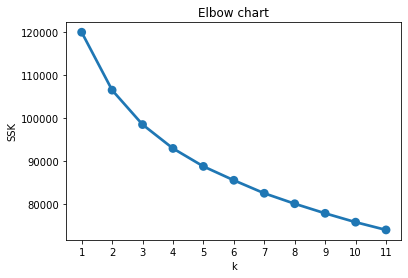

In [24]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,12):
    kmeans = KMeans(n_clusters = k, random_state = 200)
    kmeans.fit(data_z)
    sse[k] = kmeans.inertia_
plt.title('Elbow chart')
plt.xlabel('k')
plt.ylabel('SSK')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()));

By using the elbow chart, we would like to select 4 as the cluster number

In [25]:
kmeans = KMeans(n_clusters = 4, random_state = 200)
kmeans.fit(data_z)
labels = kmeans.labels_

In [26]:
numeric_data.columns

Index(['householdID', 'total_ppl', 'square_foot', 'household_income',
       'number_pets', 'entertainment_spend_est', 'travel_spend_est',
       'under_12'],
      dtype='object')

In [27]:
data2 = data_z.assign(Cluster = labels)
data2.groupby(['Cluster']).agg({
    'householdID':'mean',
    'total_ppl':'mean',
    'square_foot':'mean',
    'household_income':'mean',
    'number_pets':'mean',
    'entertainment_spend_est':'mean',
    'travel_spend_est':'mean',
    'under_12':'mean',
}).round(2)

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
Cluster,,,,,,,,
0,-0.03,1.24,-0.18,-0.00,-0.05,-0.01,-0.13,0.87
1,0.03,-0.41,-0.53,-0.10,-0.93,-0.06,-0.40,-0.32
2,0.02,-0.39,-0.47,-0.09,0.96,-0.07,-0.34,-0.28
3,-0.02,-0.19,1.07,0.18,-0.03,0.13,0.80,-0.10


In [28]:
data2.head()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12,Cluster
0,-1.731935,-0.145886,0.232960,0.421607,-0.644446,-0.152014,-1.190688,-1.047109,1
1,-1.731704,-0.145886,0.851909,-1.325289,0.621159,0.341153,0.636601,-1.047109,3
2,-1.731473,-0.145886,-0.645826,1.903227,0.621159,-0.868282,0.218125,0.318923,2
3,-1.731243,-1.267513,-0.601703,-0.239450,-0.644446,-0.191155,-1.217364,-1.047109,1
4,-1.731012,-0.145886,-0.829672,-0.520825,0.621159,1.160490,-3.688205,0.318923,2


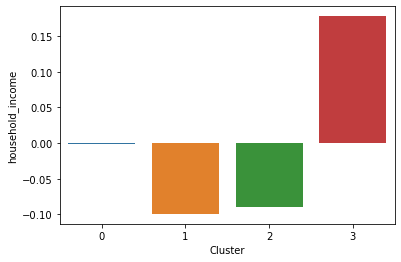

In [29]:
sns.barplot(x = 'Cluster', y = 'household_income', ci = None, data = data2);

In [30]:
flag = data2[(data2.Cluster == 0) | (data2.Cluster == 1)|(data2.Cluster == 2) | (data2.Cluster == 3)]

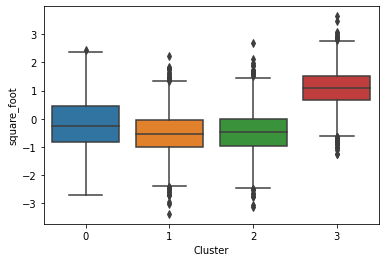

In [31]:
sns.boxplot(x = 'Cluster', y = 'square_foot', data = flag);

Square foot in each clusters. Cluster 3 is the biggest and 1 is the smallest

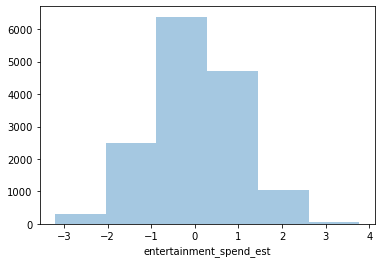

In [32]:
sns.distplot(flag.entertainment_spend_est, kde = False, bins = 6);

Most of consumers from the 4 Clusters' entertainment spend level maintained in the middle level, no matter which income level they have.

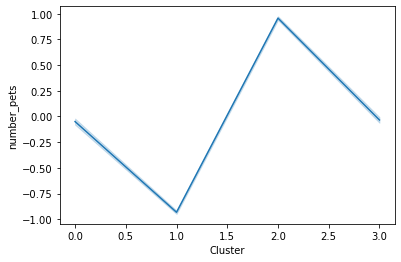

In [33]:
sns.lineplot(x = 'Cluster', y = 'number_pets', data = flag);

This line chart showed the pets distribution in each cluster. Cluster 2 has the most pets generally, and cluster 1 has the lowest. Others just in the middle level.

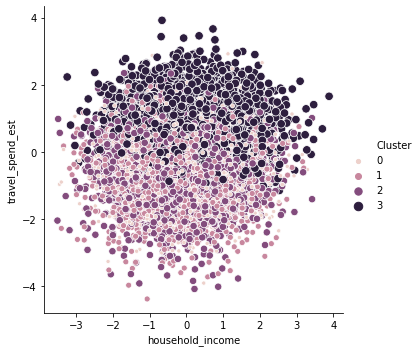

In [34]:
sns.relplot(x = 'household_income', y = 'travel_spend_est', data = flag, hue = 'Cluster', size = 'Cluster');

From the plot we can see no matter which level of income the residents have, they all have enthusiasm in travelling. The most sighnificant info is almost of all the Cluster 3 people stayed over the average level of travelling spend.

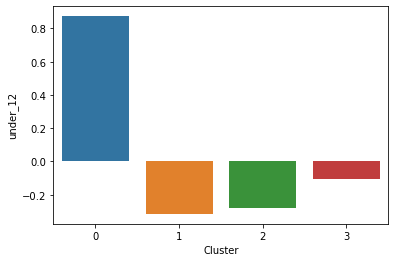

In [35]:
sns.barplot(x = 'Cluster', y = 'under_12', ci = None, data = data2);

In conclusion, different cluster has its own feature in different fields.


Cluster 0: The children

This group's most significant feature is that they have the larggest number of children. The other factors like income and total spending are in the middle level. So we would like to target this one as a children group. Most likely we will push them a lot of toys, candies and snacks products.


Cluster 1: The poor

The cluster 1 is in the lowest income level, so they really don't have many abilities to travel, entertain and buying. But we won't give up every potential consumers. If we have any discount activities, cluster 1 will be our first target.


Cluster 2: Pets Lover

The majority of pets are living the cluster 2 cummunity. Pet lovers will not stingy with their wallets if they buying some daily necessities for their pets. So hurry on, let's send them some pet supplies and pet toys sales advertisements.

 
Cluster 3: Rich man

Cluster 3 is the wealthy, and they show extremely high purchasing power and desire to buy in any consumption. Most of our promotional information can be sent to them. In addition, we can also prepare international luxury goods and design high-end travel routes and entertainment projects for them. They will be happy to pay us a large amount of money.

## Part3 Conjoint Analysis & Memo Section 

In [36]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [37]:
hotpot = pd.read_csv("hotpot.csv")
hotpot

,bundleID,soupbase,maindishI,maindishII,dipping,snack,avg_rating
0,1,Tomato Soup Base,Tofu Pudding,Smashed Shrimp Paste,Fragrant,Deep-Fried Crispy Pork,5.47
1,2,Tomato Soup Base,Tofu Pudding,Smashed Shrimp Paste,Fragrant,Dough Stick With Fennel,7.88
2,3,Tomato Soup Base,Tofu Pudding,Smashed Shrimp Paste,Spicy,Deep-Fried Crispy Pork,6.20
3,4,Tomato Soup Base,Tofu Pudding,Smashed Shrimp Paste,Spicy,Dough Stick With Fennel,8.00
4,5,Tomato Soup Base,Tofu Pudding,Smashed Shrimp Paste,Seafood,Deep-Fried Crispy Pork,8.24
...,...,...,...,...,...,...,...
379,380,Three Delicacies Soup Base,Special Mutton,Fish Cakes,Fragrant,Dough Stick With Fennel,4.66
380,381,Three Delicacies Soup Base,Special Mutton,Fish Cakes,Spicy,Deep-Fried Crispy Pork,6.10
381,382,Three Delicacies Soup Base,Special Mutton,Fish Cakes,Spicy,Dough Stick With Fennel,6.74
382,383,Three Delicacies Soup Base,Special Mutton,Fish Cakes,Seafood,Deep-Fried Crispy Pork,8.47


Here shows the 384 different average rating feedbacks from customer who already attended our hotpot event.

In [38]:
hp1 = pd.get_dummies(hotpot,drop_first=True, columns=['soupbase','maindishI','maindishII','dipping','snack'])
hp1

,bundleID,avg_rating,soupbase_Mushroom Soup Base,soupbase_Three Delicacies Soup Base,soupbase_Tomato Soup Base,maindishI_Special Mutton,maindishI_Spicy Marinated Beef,maindishI_Tofu Pudding,maindishII_Fish Cakes,maindishII_Lobster Tails,maindishII_Smashed Shrimp Paste,dipping_Seafood,dipping_Spicy,snack_Dough Stick With Fennel
0,1,5.47,0,0,1,0,0,1,0,0,1,0,0,0
1,2,7.88,0,0,1,0,0,1,0,0,1,0,0,1
2,3,6.20,0,0,1,0,0,1,0,0,1,0,1,0
3,4,8.00,0,0,1,0,0,1,0,0,1,0,1,1
4,5,8.24,0,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,4.66,0,1,0,1,0,0,1,0,0,0,0,1
380,381,6.10,0,1,0,1,0,0,1,0,0,0,1,0
381,382,6.74,0,1,0,1,0,0,1,0,0,0,1,1
382,383,8.47,0,1,0,1,0,0,1,0,0,1,0,0


After get dummies, I have the 0 and 1 in the dataset and to indicate the apperance for each type of soup,dish,sauce and snack. Next I will put those columns into a linear model to detect the coefficient between average rating and the appearance of each.

In [39]:
hp1.columns

Index(['bundleID', 'avg_rating', 'soupbase_Mushroom Soup Base',
       'soupbase_Three Delicacies Soup Base', 'soupbase_Tomato Soup Base',
       'maindishI_Special Mutton', 'maindishI_Spicy Marinated Beef',
       'maindishI_Tofu Pudding', 'maindishII_Fish Cakes',
       'maindishII_Lobster Tails', 'maindishII_Smashed Shrimp Paste',
       'dipping_Seafood', 'dipping_Spicy', 'snack_Dough Stick With Fennel'],
      dtype='object')

In [40]:
x = hp1[['soupbase_Mushroom Soup Base',
       'soupbase_Three Delicacies Soup Base', 'soupbase_Tomato Soup Base',
       'maindishI_Special Mutton', 'maindishI_Spicy Marinated Beef',
       'maindishI_Tofu Pudding', 'maindishII_Fish Cakes',
       'maindishII_Lobster Tails', 'maindishII_Smashed Shrimp Paste',
       'dipping_Seafood', 'dipping_Spicy', 'snack_Dough Stick With Fennel']]
y = hp1['avg_rating']

In [41]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [42]:
coef_df = pd.DataFrame(regressor.coef_, x.columns,columns=['Coefficient'])
coef_df

,Coefficient
soupbase_Mushroom Soup Base,0.06
soupbase_Three Delicacies Soup Base,-0.12
soupbase_Tomato Soup Base,0.10
maindishI_Special Mutton,0.81
maindishI_Spicy Marinated Beef,0.83
maindishI_Tofu Pudding,0.22
maindishII_Fish Cakes,0.19
maindishII_Lobster Tails,-0.04
maindishII_Smashed Shrimp Paste,0.35
dipping_Seafood,-0.12


By get dummies, I left out one type of each column and their coefficient with the average rating is 0. Here, we have found several options that would decrease the overall rating of the bundle, so we decide to clean them out from our final bundle suggestion.


So here are the options left(coefficient >= 0):

Coefficient from highest to least in each column:

Soup base: Tomato soup > Mushroom soup > Classic Spicy Soup Base

Maindish I:  Spicy Marinated Beef > Special Mutton > Tofu Pudding > Beef Tripe

Maindish II: Smashed Shrimp Paste > Fish Cakes > Crab Sticks

Dipping: Fragrant (Since the fragrant is the only one has the highest coefficient which is 0, we choose it for our reference)

Snack: Dough Stick with Fennel > Deep-Fried Crispy Pork

Snack: Dough Stick with Fennel > Deep-Fried Crispy Pork

However, despite the coefficient with the average rating, we still need to consider the cost and our revenue for the bundle.

In [43]:
cost = pd.read_csv("vendor_costs.csv")
cost

,Item,Item Category,Cost Per Serving (Dollars)
0,Tomato Soup Base,Soup Base,3.40
1,Classic Spicy Soup Base,Soup Base,3.50
2,Mushroom Soup Base,Soup Base,2.90
3,Three Delicacies Soup Base,Soup Base,4.60
4,Tofu Pudding,Main Dish I,5.70
5,Spicy Marinated Beef,Main Dish I,6.00
6,Beef Tripe,Main Dish I,5.30
7,Special Mutton,Main Dish I,6.10
8,Smashed Shrimp Paste,Main Dish II,5.30
9,Crab Sticks,Main Dish II,4.70


In [44]:
Soup_base = ['Tomato soup', 'Mushroom soup', 'Classic Spicy Soup Base']
Soup_base_cost = [3.4,2.9,3.5]
Maindish_I = ['Spicy Marinated Beef' , 'Special Mutton' , 'Tofu Pudding','Beef Tripe']
Maindish_I_cost = [6,6.1,5.7,5.3]
Maindish_II = ['Smashed Shrimp Paste' , 'Fish Cakes','Crab Sticks']
Maindish_II_cost = [5.3,4.7,4.7]
Dipping = ['Fragrant']
Dipping_cost = [0.2]
Snack = ['Dough Stick with Fennel','Deep-Fried Crispy Pork']
Snack_cost = [0.7,0.6]

In [45]:
def rev_fun():
    entry = 15
    bundle = []
    reve = []
    for i in range(0,len(Soup_base)):
        soupcost = Soup_base_cost[i]
        for j in range(0,len(Maindish_I)):
            MaindishI_cost = Maindish_I_cost[j]
            for k in range(0,len(Maindish_II)):
                MaindishII_cost = Maindish_II_cost[k]
                for l in range(0,len(Dipping)):
                    Dippingcost = Dipping_cost[l]
                    for f in range(0,len(Snack)):
                        Snackcost = Snack_cost[f]
                        bundle.append([Soup_base[i],Maindish_I[j],Maindish_II[k],Dipping[l],Snack[f]])
                        reve.append(15-(soupcost+MaindishI_cost+MaindishII_cost+Dippingcost+Snackcost))
    revenue0 = {'Bundle': bundle,'Revenue': reve}
    rev = pd.DataFrame(revenue0, columns = ['Bundle','Revenue'])
    return rev

In [46]:
revenue1 = rev_fun()
revenue1 = revenue1.sort_values(by=['Revenue'],ascending=False)
revenue1

,Bundle,Revenue
47,"[Mushroom soup, Beef Tripe, Crab Sticks, Fragr...",1.30
45,"[Mushroom soup, Beef Tripe, Fish Cakes, Fragra...",1.30
44,"[Mushroom soup, Beef Tripe, Fish Cakes, Fragra...",1.20
46,"[Mushroom soup, Beef Tripe, Crab Sticks, Fragr...",1.20
41,"[Mushroom soup, Tofu Pudding, Crab Sticks, Fra...",0.90
...,...,...
49,"[Classic Spicy Soup Base, Spicy Marinated Beef...",-0.60
55,"[Classic Spicy Soup Base, Special Mutton, Smas...",-0.70
6,"[Tomato soup, Special Mutton, Smashed Shrimp P...",-0.70
48,"[Classic Spicy Soup Base, Spicy Marinated Beef...",-0.70


Since there are lots of negative revenue, we decide to remove them from our table and try to exlore the suggestion.

In [47]:
revenue2 = revenue1[(revenue1['Revenue']>0)]
revenue2

,Bundle,Revenue
47,"[Mushroom soup, Beef Tripe, Crab Sticks, Fragr...",1.30
45,"[Mushroom soup, Beef Tripe, Fish Cakes, Fragra...",1.30
44,"[Mushroom soup, Beef Tripe, Fish Cakes, Fragra...",1.20
46,"[Mushroom soup, Beef Tripe, Crab Sticks, Fragr...",1.20
41,"[Mushroom soup, Tofu Pudding, Crab Sticks, Fra...",0.90
39,"[Mushroom soup, Tofu Pudding, Fish Cakes, Frag...",0.90
23,"[Tomato soup, Beef Tripe, Crab Sticks, Fragran...",0.80
21,"[Tomato soup, Beef Tripe, Fish Cakes, Fragrant...",0.80
40,"[Mushroom soup, Tofu Pudding, Crab Sticks, Fra...",0.80
38,"[Mushroom soup, Tofu Pudding, Fish Cakes, Frag...",0.80


Above is the combination which has non negative revenues, to give the bundle option suggestion, we calculate the option's apperances in the non-negative table. The higher number of one option appears, the more likely this option could be a profitable option. And it can better explain the option suggestion

In [48]:
pd.options.mode.chained_assignment = None  # default='warn'
def counting(df):
    counts=[]
    for i in range(0,len(df)):
        lst = revenue1.iloc[i,0]
        for j in range(0,5):# 5 is the total number of category so that I can combine all the options to one list then count unique value
            counts.append(lst[j])
    idx = pd.Index(counts) 
    return idx.value_counts() 
counting(revenue2)

Fragrant                   46
Deep-Fried Crispy Pork     27
Mushroom soup              21
Fish Cakes                 19
Crab Sticks                19
Dough Stick with Fennel    19
Beef Tripe                 17
Tofu Pudding               14
Tomato soup                14
Classic Spicy Soup Base    11
Spicy Marinated Beef        9
Smashed Shrimp Paste        8
Special Mutton              6
dtype: int64

Finally, from the counting of each option's number of appearance, I can give the suggestions for the bundle options and that can make customer happy and make money for us at the same time. 

If we just want our customer happy and despite the revenue we can make. We can just use those options with non-negative coefficient with ratings. For the Soup base selection, we think we can discard the Three Delicacies Soup Base because it has negative coefficient with rating. So for the soup selection, we still have Tomato Soup Base, Classic Spicy Soup Base and Mushroom Soup Base for selection. For the Main Dish I, we think nothing should be discarded because there is no negative coefficient option with rating in this category. However, if we really need to cut off some options for Main Dish I because of the budget, we wil keep the Special Mutton and Spicy Marinated Beef because they significantly increase our rating, and this two options are the most significant options because these two have the highest coefficient with customer rating. This may indicate that those customers are meat lovers! Just imagining how comfortable it will be if we are having hot spicy mutton and beef in the cold winter! For the Main Dish II, we find that the showing up of the lobster tail will kind of decrease the customer rating for the bundle. So we are thinking of discard it from our Main Dish II category(But we like it because we are lobsterland!).  Moreover, for the Dipping Sauce, we find that people don't like spicy and seafood sauce compared to the fragrant sauce. We are thinking that may because people can have spicy soup and seafood in the hotpot base and main dish II, so it's not necessary for customer to have those two flavor of dipping sauce. For the snack options, customers are slighterly prefer the Dough Stick With Fennel, it may because the crispy pork is too much for the snacks.

However, despite the customers preferances, we still need to consider about our cost and revenue. So at first we made the revenue table for the bundle of all non-negative coefficient options. And then we select those bundles which have revenue higher than 0. Furthermore, it shows us that we get 46 kinds of bundles with positive revenue. Finally, since each row is a bundle in this table and conduct a positive revenue, we decide to count all the number of appearance of each options for all rows. The higher number of appearance the option has, the more likely it could be a profitable option. For example, Mushroom soup appears 10 times more than the Classic Spicy soup, so mushroom soup may have higher probabilty to bring us profit because there are more postive revenue bundles contain mushroom soup than the Classical Spicy soup. 

According to the revenue table, we can design our menu and try to make those profitable options be more attractive, and promote them to our customer when they are ordering.

At last, by sorting the number of appearances table. We get the best menu chioces below and we ordered it by profit.

Soup base: Mushroom soup > Tomato soup > Classic Spicy Soup Base

Maindish I: Beef Tripe > Tofu Pudding > Spicy Marinated Beef > Special Mutton. So even beef and mutton have high rating, the profit they generate are not as high as the other two.

Maindish II: Fish Cakes = Crab Sticks > Smashed Shrimp Paste

Dipping: Fragrant

Snack:  Deep-Fried Crispy Pork > Dough Stick with Fennel

## Part4 Forecasting Total Spending

In [49]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
from sklearn import linear_model
from sklearn . metrics import mean_squared_error , r2_score

In [50]:
data = pd.read_csv('FNLC.csv')

Add a new 'Day' column here as the X axis

In [51]:
data['Day'] = range(1,254)

In [52]:
y = data['Close']

In [53]:
x = data['Day']

In [54]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Day
count,253.00,253.00,253.00,253.00,253.00,253.00,253.00
mean,23.34,23.81,22.78,23.30,22.69,15868.38,127.00
std,3.56,3.44,3.71,3.60,3.31,11284.83,73.18
min,18.17,18.47,17.62,18.22,17.47,2300.00,1.00
25%,20.58,21.16,20.01,20.59,20.05,7800.00,64.00
50%,21.83,22.24,21.33,21.85,21.46,12700.00,127.00
75%,25.40,26.41,25.17,25.60,25.19,21600.00,190.00
max,30.50,30.64,30.20,30.59,29.04,103300.00,253.00


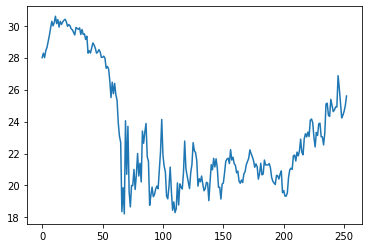

In [55]:
data['Close'].plot();

With the time going, the share price data's changing trend does not fit the simple linear model. So We are going to use one polynomial linear to analysis.

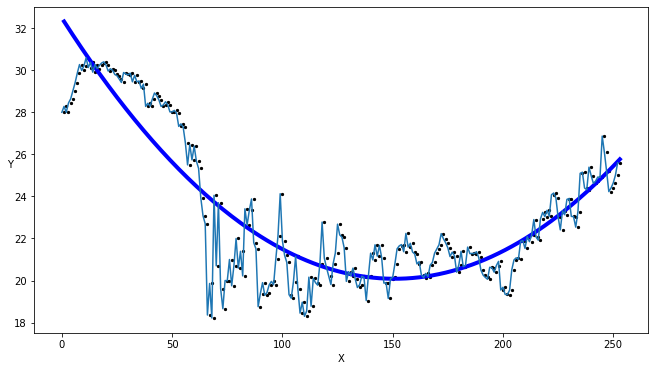

In [56]:
degree = 2
weights = np. polyfit (x,y, degree)
model = np. poly1d ( weights )

y_points = model (x)
ax , fig = plt.subplots ()
plt.xlabel ('X')
plt.ylabel ('Y', rotation =0)
plt.plot (x, y_points , lw =4 , color ='blue')
plt.scatter (x, y, color ='black', s =5)
data['Close'].plot(figsize=(11, 6))
plt.show ()

We can see that when the degree equals two, the model would be more fit to quadratic polynomial. So we can based on this model to make a prediction for Dec end day share price.

In [57]:
degree = 2
weights = np. polyfit (x,y, degree)
model = np. poly1d ( weights )
predicted = model (x)
rmse = np. sqrt ( mean_squared_error (y, predicted ))
r2 = r2_score (y, predicted )

In [58]:
model(280)

29.16838513565145

In [59]:
data['Close'].mean()

23.30047430830039

In [60]:
rmse

1.5956399650609223

In [61]:
r2

0.8027234639668088

After downloading the historical data from website and seeing the distribution with plot function, we found that the growing trend of data does not fit the simple linear method. So we decided to use the polynomial linear method to analysis and make prediction. By adjusting the degree level, we got the quadratic polynomial could best fit the data trend. And our prediction value for the end of Dec in 2020 is about 29.17, 5.87 higher than the historical mean 23.30. And RMSE value is just 1.6 and one quite high value of R square is 0.80, which is good enough for supporting our model.

## Part5 Classification

In [62]:
cv = pd.read_csv('carnival_visitors.csv')

In [63]:
cv.head()

,Unnamed: 0,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,0,1,113831.00,418044.00,Finance,45,4,12,Maine,LuxurySedan,5,entertain
1,1,2,66441.00,454233.00,Tech,44,4,11,Maine,LuxurySedan,1,consume
2,2,3,160024.00,602594.00,Finance,38,2,6,Vermont,LuxurySedan,2,entertain
3,3,4,82985.00,473262.00,Govt,39,3,8,Massachusetts,LuxurySedan,4,consume
4,4,5,109369.00,527138.00,Finance,43,5,5,Massachusetts,SUV,3,entertain


Dropping the Unnamed and householdid column then Converting those categorical value to dummy variables, and do the ont-hot encoding for primary column.

In [64]:
cv = cv.drop(['Unnamed: 0', 'householdID'], axis=1)

In [65]:
cv.isnull().sum()

est_inc_USD         0
est_netw_USD        0
hhold_field         0
hhold_oldest        0
hhold_pax           0
hhold_youngest      0
homeState           0
hhold_car         551
stream_subs         0
primary             0
dtype: int64

Here, we find 551 missing values in the dataset. So we decide to drop them since we get 15000 rows of data.

In [66]:
cv.dropna(inplace=True)
cv.isnull().sum()

est_inc_USD       0
est_netw_USD      0
hhold_field       0
hhold_oldest      0
hhold_pax         0
hhold_youngest    0
homeState         0
hhold_car         0
stream_subs       0
primary           0
dtype: int64

Now, there is no null value in the dataset.

In [67]:
cv1 = pd.get_dummies(cv,drop_first=True, columns=['hhold_field','homeState','hhold_car','primary'])

In [68]:
list(cv1.columns)

['est_inc_USD',
 'est_netw_USD',
 'hhold_oldest',
 'hhold_pax',
 'hhold_youngest',
 'stream_subs',
 'hhold_field_Finance',
 'hhold_field_Govt',
 'hhold_field_Manufacturing',
 'hhold_field_Other',
 'hhold_field_Services',
 'hhold_field_Tech',
 'homeState_Connecticut',
 'homeState_Maine',
 'homeState_Massachusetts',
 'homeState_New Hampshire',
 'homeState_New York',
 'homeState_Ontario',
 'homeState_Quebec',
 'homeState_Rhode Island',
 'homeState_US_Other',
 'homeState_Vermont',
 'hhold_car_LuxurySedan',
 'hhold_car_Pickup',
 'hhold_car_SUV',
 'hhold_car_Sedan',
 'primary_entertain']

Since there are too many homastate locaitons among our customers, we decide to bin them and assign them into two categories. the US and Canada.Moreover, we will assign the Luxurysedan type to sedan in the hhold_car feature. It's better for us to build the logistic regression model.

In [69]:
cv['homeState'] = cv['homeState'].replace(['Connecticut','New Hampshire','Vermont','Massachusetts','Rhode Island','New York','Maine','US_Other'],'US')
cv['homeState'] = cv['homeState'].replace(['Ontario','Quebec','Can_Other'],'Canada')
cv['hhold_car'] = cv['hhold_car'].replace(['LuxurySedan'],'Sedan')

In [70]:
cv2 = pd.get_dummies(cv,drop_first=True, columns=['hhold_field','homeState','hhold_car','primary'])
cv2

,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,hhold_field_Finance,hhold_field_Govt,hhold_field_Manufacturing,hhold_field_Other,hhold_field_Services,hhold_field_Tech,homeState_US,hhold_car_Pickup,hhold_car_SUV,hhold_car_Sedan,primary_entertain
0,113831.00,418044.00,45,4,12,5,1,0,0,0,0,0,1,0,0,1,1
1,66441.00,454233.00,44,4,11,1,0,0,0,0,0,1,1,0,0,1,0
2,160024.00,602594.00,38,2,6,2,1,0,0,0,0,0,1,0,0,1,1
3,82985.00,473262.00,39,3,8,4,0,1,0,0,0,0,1,0,0,1,0
4,109369.00,527138.00,43,5,5,3,1,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,136586.00,443222.00,48,3,11,1,0,0,0,0,0,1,1,0,1,0,0
14996,113057.00,540067.00,42,2,16,1,0,1,0,0,0,0,1,1,0,0,1
14997,103937.00,507584.00,48,6,10,4,0,0,0,0,0,1,0,0,0,1,1
14998,137577.00,528343.00,38,3,12,1,0,0,0,0,0,1,1,0,0,0,1


In [71]:
colnames = list(cv2.columns)

In [72]:
X = cv2[['est_inc_USD', 'est_netw_USD', 'hhold_oldest','hhold_pax','hhold_youngest','stream_subs', 'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing', 'hhold_field_Other',
        'hhold_field_Services','hhold_field_Tech','homeState_US','hhold_car_Pickup','hhold_car_SUV','hhold_car_Sedan']]
Y = cv2['primary_entertain']

In [73]:
from sklearn . preprocessing import StandardScaler
scaler = StandardScaler (). fit (X)
X = scaler . transform (X)

Performing the standard scaler to aviod the overall influences for large feature in logistic regression model.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=60)

In [75]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [76]:
logmodel.intercept_

array([0.26282617])

In [77]:
logmodel.coef_

array([[-0.44795775,  0.27094725, -0.12386188,  0.12422485, -0.13452451,
         0.04598135, -0.43356062, -0.59673227, -0.08806791, -0.03518055,
         0.04444272, -0.20587234,  0.0266443 ,  0.05671735,  0.12666581,
         0.21512091]])

In [78]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
pd.DataFrame(data=logmodel.coef_.transpose(),index=colnames[0:-1],columns=['Coef'])

,Coef
est_inc_USD,-0.4479577478
est_netw_USD,0.2709472490
hhold_oldest,-0.1238618754
hhold_pax,0.1242248547
hhold_youngest,-0.1345245113
stream_subs,0.0459813506
hhold_field_Finance,-0.4335606192
hhold_field_Govt,-0.5967322698
hhold_field_Manufacturing,-0.0880679089
hhold_field_Other,-0.0351805455


Here, we find all the coefficient for the prediction of the desire for attending the carnival event. From the table I find that those high coefficient value are negative to the entertain. ( which means the higher negative value of the coefficient with the entertain, the feature has higher positive correlation with consume.) 

So, who will be more correlated with the entertainment? From the table, we find that the higher estimate number of one combined net worth of the households has, the higher likely this hosehold will have the desire for entertainment because this feature has 0.27 coefficient. Moreover, the household who own a sedan will more likely to be a 'entertain' customer because it has 0.21 coefficient. The other features don't have so much impact on the prediction for entertainment desire. Furthermore, we think the reason why those features are correlated with entertain are because for those high net worth household, they may have more time and older, and they will build their habbits so they may be attracted by the entertainment such as live shows, performance acts, concerts, ice sculpture contests and live competitions. So I think this group of people could be our revenue generator since they have 'Extra money' to spend, and we will try to sell the event peripheral products after winter carnival. What's more, the correlation with sedan owner indicates that we don't need to prepare so much packing boxes for food and drinks since those driving customers are more attracted by our entertainment.( We have to prepare more packing boxes for the driving customers if they are more attracted by eating and drinking because drivers like to curveside pick up!)

Talking about the people who are more attracted by consuming, the coefficient table shows that the estimate income, finance people, goverment people and tech people are attracted by our eating/drinking attractions, as well as shopping opportunities. Moreover, estimate income, finance people and goverment people show strong coefficient with consuming. Maybe because those people are stressful during work, and they are enough for the concerts or live shows because they always been invited(especially those people who work for goverment), all they need is consolation of food! 

## Part6 AB testing 

In [79]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [80]:
df = pd.read_csv("ab_music.csv")
df

,recipient,picture,clickthrough
0,1,beach,no
1,2,concert,no
2,3,concert,no
3,4,concert,yes
4,5,concert,no
...,...,...,...
19995,19996,concert,no
19996,19997,concert,no
19997,19998,concert,no
19998,19999,concert,no


In [81]:
df[df["clickthrough"] == "yes"].count()

recipient       4823
picture         4823
clickthrough    4823
dtype: int64

In [82]:
beachyes = df[df["clickthrough"] == "yes"][df["picture"] == "beach"].count()
beachyes

<ipython-input-82-64c86cc6c3fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  beachyes = df[df["clickthrough"] == "yes"][df["picture"] == "beach"].count()


recipient       2118
picture         2118
clickthrough    2118
dtype: int64

In [83]:
concertyes = df[df["clickthrough"] == "yes"][df["picture"] == "concert"].count()
concertyes

<ipython-input-83-9232a0c186f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  concertyes = df[df["clickthrough"] == "yes"][df["picture"] == "concert"].count()


recipient       2705
picture         2705
clickthrough    2705
dtype: int64

In [84]:
import scipy
from scipy.stats import chisquare

observed_values=np.array([2118,2705])
expected_values=np.array([2411.5,2411.5])

scipy.stats.chisquare(observed_values, f_exp=expected_values)


Power_divergenceResult(statistic=71.44287787684014, pvalue=2.8540212722372576e-17)

In [85]:
print('%.020f' % 2.8540212722372576e-17)

0.00000000000000002854


The null hypotheses is that the observed and expected counts in each group are equal, which means there is no significant different between those two picture. However, the p-value below 0.05 whcih the hypothesis can be rejected. In other words, those two pictures attract customers way different. We prefere to choose this concert poster which our audience click it more.


## Conclusion 

Before we initiate the new project, winter wonderland. It is neccesary to make researchs, analysis profits and avoid potential risk. In this project, our goal is to maximum profit and make cash insusion happen. That is attract more customers to our winterland, make sure to satisfied customer's demand and make them enjoy our land. To serve this goal, our management team analysis dataset and made conclusion for each part. 

This report included seven datasets, which helps us better operate the wonderland. Angle_market dataset used groupby function, generate summary statistics wich assists us find potential partners(vendors landed to our new project); Secondly, to generate customer portrait, we use linear regression to analysis portlan_family dataset, we are able to precisely serve each segment group. Third, when it comes to attracts people with gourmate, we are professionals! By analysis hotpot and vender_cost those two dataset, we have sent a detailed report. Third, using classification predict carnival_visitors data set, we find all the coefficient for the prediction of the desire for attending the carnival event; Last but not least, a music star would land to our new project, that is to attract more people enjoy this event, we need to enact marketing strategies, that's why we introduce AB testing here, to relase the most inspiring poster! 

Analysis data helps our management team make effective deceisions. By pos analysis those historical data and predict future situations (groupby/ classication prediction/ linear regression and ect.) gives us a clear picture of landing our project smoothlly.